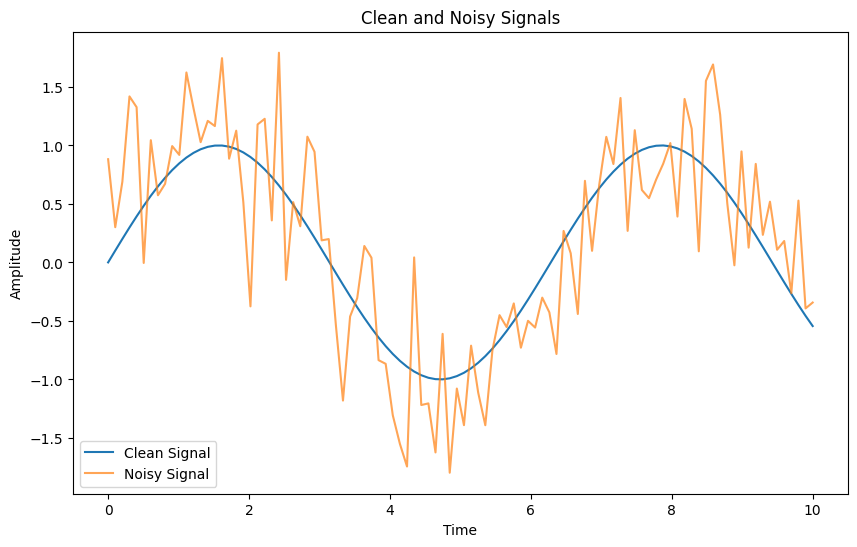

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#NOISY ENVIRONMENT SIMULATION

# Generate a clean signal (e.g., a sine wave)
np.random.seed(0)
t = np.linspace(0, 10, 100)  # time vector
clean_signal = np.sin(t)

# Add Gaussian noise to the clean signal
noise = np.random.normal(0, 0.5, t.shape)
noisy_signal = clean_signal + noise

# Plot the clean and noisy signals
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Clean and Noisy Signals')
plt.show()

In [18]:
#LMS Adaptative Filter Implementation 

def lms_filter(noisy_signal, desired_signal, mu, filter_order): #mu: step size
    n_samples = len(noisy_signal)
    weights = np.zeros(filter_order)
    filtered_signal = np.zeros(n_samples)
    
    for i in range(filter_order, n_samples):
        x = noisy_signal[i-filter_order:i][::-1]  # Input vector
        y = np.dot(weights, x)  # Filter output
        error = desired_signal[i] - y  # Error calculation
        weights += 2 * mu * error * x  # Update weights
        filtered_signal[i] = y
    
    return filtered_signal, weights

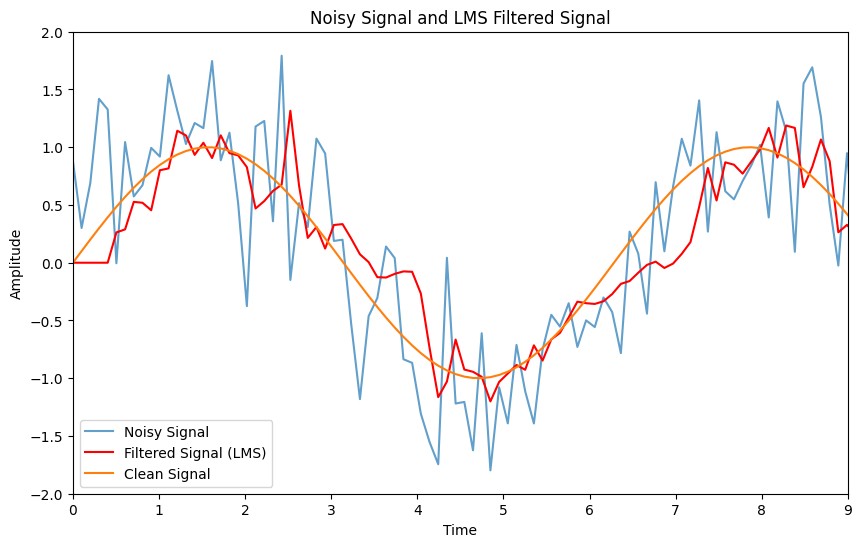

In [19]:
#Apply LMS to noisy signal

# Parameters
mu = 0.1  # Learning rate
filter_order = 4 # Filter order

# Apply LMS filter
filtered_signal, weights = lms_filter(noisy_signal, clean_signal, mu, filter_order)

#Filtered Signal Visualization

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.plot(t, filtered_signal, label='Filtered Signal (LMS)', color='red')
plt.plot(t, clean_signal, label='Clean Signal')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noisy Signal and LMS Filtered Signal')
plt.xlim(0, 9)  # Ajusta el eje x de 0 a 8
plt.ylim(-2, 2)  # Ajusta el eje x de 0 a 8
plt.show()

#source: https://www.geeksforgeeks.org/machine-learning/least-mean-squares-filter-in-signal-processing/

In [20]:
def calculate_snr(signal, noise):
    """Devuelve el SNR en decibeles."""
    power_signal = np.mean(signal**2)
    power_noise = np.mean(noise**2)
    return 10 * np.log10(power_signal / power_noise)

# Señal limpia (original)
signal = clean_signal

# Ruido antes del filtrado
noise_before = noisy_signal - signal

# Ruido después del filtrado
noise_after = filtered_signal - signal

# Cálculo de SNR
snr_before = calculate_snr(signal, noise_before)
snr_after = calculate_snr(signal, noise_after)

print(f"SNR antes del filtrado: {snr_before:.2f} dB")
print(f"SNR después del filtrado: {snr_after:.2f} dB")


SNR antes del filtrado: 2.69 dB
SNR después del filtrado: 7.78 dB
